In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3


dataset = pd.read_csv(body)
dataset.head()


In [10]:
dataset.columns
dataset.head()
dataset.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


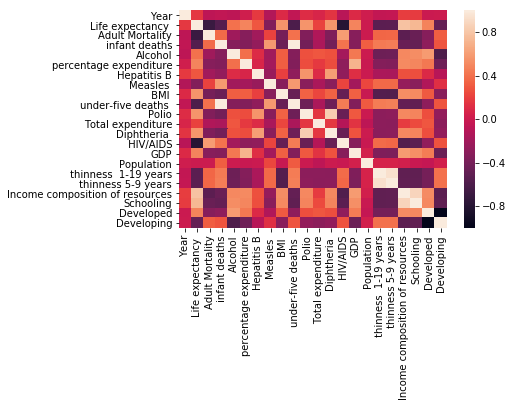

In [15]:
#Visualising the dataset
corr=dataset.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)


In [11]:
features=['Country', 'Year', 'Status', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']



#Data Cleaning

dataset.isna().sum()

countries=dataset.Country.unique()

dataset=dataset.interpolate(method="linear",limit_direction="forward")
new=dataset


In [12]:

#Finding outliers
newfeatures=['Adult Mortality','Life expectancy ',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']

for variable in newfeatures:
    q75, q25 = np.percentile(dataset[variable], [75 ,25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    print("Number of outliers and percentage of it in {} : {} and {}".format(variable,
                                                                             len((np.where((dataset[variable] > max_val) | (dataset[variable] < min_val))[0])),
                                                                             len((np.where((dataset[variable] > max_val) | (dataset[variable] < min_val))[0]))*100/1987))
    
#Removing outliers
from scipy.stats.mstats import winsorize

dataset['Life expectancy '] = winsorize(dataset['Life expectancy '],(0.01,0))
dataset['Adult Mortality']= winsorize(dataset['Adult Mortality'],(0,0.03))
dataset['infant deaths'] = winsorize(dataset['infant deaths'],(0,0.10))
dataset['Alcohol'] = winsorize(dataset['Alcohol'],(0,0.01))
dataset['percentage expenditure']= winsorize(dataset['percentage expenditure'],(0,0.12))
dataset['Hepatitis B']= winsorize(dataset['Hepatitis B'],(0.11,0))
dataset['Measles '] = winsorize(dataset['Measles '],(0,0.19))
dataset['under-five deaths ']= winsorize(dataset['under-five deaths '],(0,0.12))
dataset['Polio'] = winsorize(dataset['Polio'],(0.09,0))
dataset['Total expenditure'] = winsorize(dataset['Total expenditure'],(0,0.01))
dataset['Diphtheria ']= winsorize(dataset['Diphtheria '],(0.10,0))
dataset[' HIV/AIDS'] = winsorize(dataset[' HIV/AIDS'],(0,0.16))
dataset['GDP'] = winsorize(dataset['GDP'],(0,0.13))
dataset['Population'] = winsorize(dataset['Population'],(0,0.14))
dataset[' thinness  1-19 years']= winsorize(dataset[' thinness  1-19 years'],(0,0.04))
dataset[' thinness 5-9 years'] = winsorize(dataset[' thinness 5-9 years'],(0,0.04))
dataset['Income composition of resources'] = winsorize(dataset['Income composition of resources'],(0.05,0))
dataset['Schooling'] = winsorize(dataset['Schooling'],(0.02,0.01))


Number of outliers and percentage of it in Adult Mortality : 82 and 4.12682435832914
Number of outliers and percentage of it in Life expectancy  : 12 and 0.6039255158530448
Number of outliers and percentage of it in infant deaths : 315 and 15.853044791142425
Number of outliers and percentage of it in Alcohol : 1 and 0.050327126321087066
Number of outliers and percentage of it in percentage expenditure : 389 and 19.577252138902868
Number of outliers and percentage of it in Hepatitis B : 248 and 12.481127327629592
Number of outliers and percentage of it in Measles  : 542 and 27.27730246602919
Number of outliers and percentage of it in  BMI  : 0 and 0.0
Number of outliers and percentage of it in under-five deaths  : 394 and 19.828887770508302
Number of outliers and percentage of it in Polio : 282 and 14.192249622546553
Number of outliers and percentage of it in Total expenditure : 35 and 1.7614494212380474
Number of outliers and percentage of it in Diphtheria  : 301 and 15.148465022647207

In [13]:

#Encoding categorical data
status=pd.get_dummies(dataset.Status)
dataset=pd.concat([dataset,status], axis=1)
dataset=dataset.drop(["Status"], axis=1)

dataset=dataset.drop(['Country'], axis=1)

#Scaling the data
y=dataset['Life expectancy ']
X=dataset.drop(["Life expectancy "], axis=1)

"""from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X=scaler.fit_transform(X)"""

#Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3, random_state=0)


R-2 score on training is: 0.85
Mean squared error: 12.83
Mean absolute error: 2.74


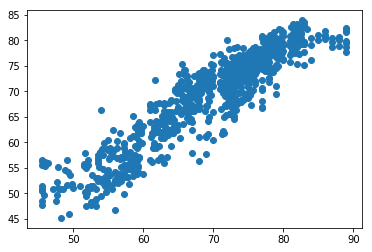

In [14]:

#Modelling

#Linear Regression
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)
prediction=regressor.predict(X_test)

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print("R-2 score on training is: %.2f"% r2_score(y_test,prediction) )
print("Mean squared error: %.2f"%mean_squared_error(y_test, prediction))
print("Mean absolute error: %.2f"%mean_absolute_error(y_test, prediction))

plt.scatter(y_test, prediction)


In [8]:
!pip install watson-machine-learning-client

In [9]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

2020-05-26 03:43:18,030 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.


In [10]:
wml_credentials={
  "apikey": "nscofHcfMEQc3XaZbTtC_qbYsQyQQ-BYDsj8l6o3hv0n",
  "instance_id": "ea1c6d99-fa13-4559-96e7-12b843b19ca4",
  "url": "https://eu-gb.ml.cloud.ibm.com"
}

In [11]:
client = WatsonMachineLearningAPIClient( wml_credentials )


In [12]:
model_props = {client.repository.ModelMetaNames.AUTHOR_NAME: "Harini", 
               client.repository.ModelMetaNames.AUTHOR_EMAIL: "harini.ramesh17@gmail.com", 
               client.repository.ModelMetaNames.NAME: "LifeExpectancy"}

In [13]:
model_artifact =client.repository.store_model(regressor, meta_props=model_props)

In [14]:
published_model_uid = client.repository.get_model_uid(model_artifact)
published_model_uid

'f28a245b-6db2-41fc-8964-42ffa69a65c3'

In [16]:
deployment = client.deployments.create(published_model_uid, name="LifeExpectancyProject")



#######################################################################################

Synchronous deployment creation for uid: 'f28a245b-6db2-41fc-8964-42ffa69a65c3' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='24bdccf5-4fbd-48b3-808f-82ea5160611d'
------------------------------------------------------------------------------------------------




In [17]:
scoring_endpoint = client.deployments.get_scoring_url(deployment)

In [18]:
scoring_endpoint


'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/ea1c6d99-fa13-4559-96e7-12b843b19ca4/deployments/24bdccf5-4fbd-48b3-808f-82ea5160611d/online'